**LLaMA**

# Introduction

**What is Llama 3?**

> An open-source large language model (LLM) developed by Meta, Llama 3 features a token vocabulary of 128,256 and a context length of 8,192 tokens. It comes in at least four variants, including the 7B + 7B instruct model and the 70B + 70B instruct model.
    
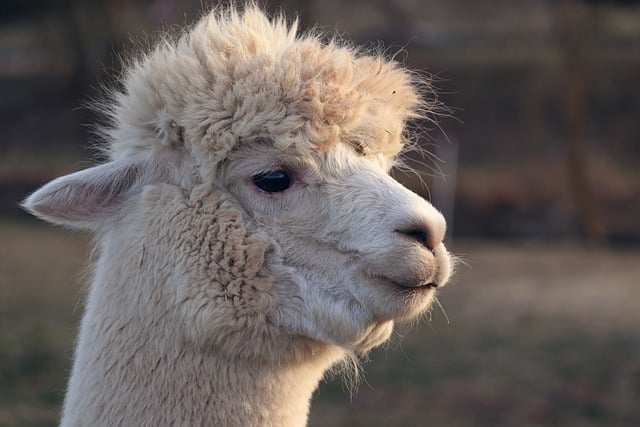

**trained Llama 3?**

> Llama 3 was trained on 15 trillion tokens across 30 languages, utilizing 24,000 GPUs. The training process **included supervised fine-tuning (SFT)** and employed advanced techniques like **rejection sampling**, **Proximal Policy Optimization (PPO)**, and **Direct Preference Optimization (DPO)** to refine the model’s performance.
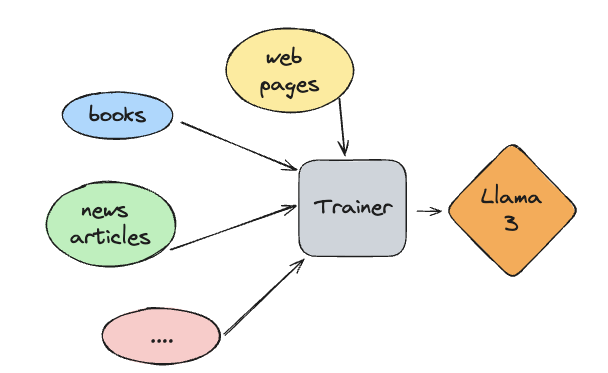

Using Llama 3 with `llama-cpp-python` involves interacting with a Python wrapper for the `llama.cpp` library. This wrapper simplifies working with Llama 3 in Python. The `Llama` class provided by the wrapper allows you to:

- Access and configure various Llama 3 parameters.
- Seamlessly interface with the underlying `llama.cpp` code, enabling easy integration of Llama 3's capabilities into Python applications for tasks like text generation or fine-tuning.

Essentially, <span class="mark">it bridges the C++ backend of Llama with Python for more accessible use</span>.
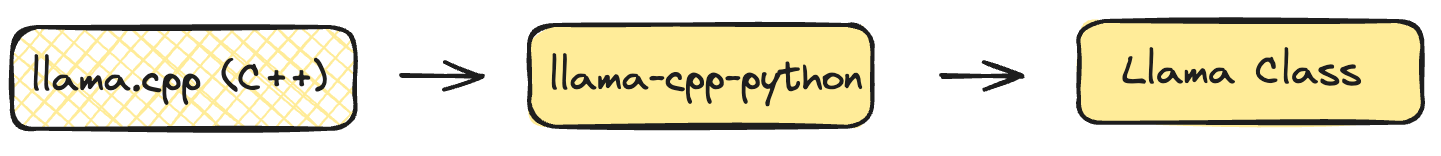

Retrieved from [Datacamp course, "Working with Llama 3"](https://app.datacamp.com/learn/courses/working-with-llama-3)

Supported LLaMA model are:

* LLaMA
* LLaMA 2
* LLaMA 3
* Mistral
* Falcon

To run `llama.cpp` library, we need to install c++ first:

1. **Install C++ Build Tools**:
   Since `llama-cpp-python` requires a C++ compiler, we need to install the necessary build tools.

   - Download and install the **Visual Studio Build Tools** from [Microsoft's website](https://visualstudio.microsoft.com/visual-cpp-build-tools/).
   - During installation, make sure to select the **"Desktop development with C++"** workload.

2. **Restart the Terminal or System**:
   After installing the build tools, restart your terminal (or your system) to ensure that the necessary environment variables are loaded.


Then install `llama-cpp-python` using `pip install llama-cpp-python`.

Finally, we should download gguf using the link below:

`huggingface-cli download TheBloke/Llama-2-7B-GGUF llama-2-7b.Q4_K_M.gguf --local-dir . --local-dir-use-symlinks False`

## Load model Locally 

We can download llama model from Hugging Face to local drive (*.gguf) and load to use it:

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

# Import the Llama class from the llama_cpp library
from llama_cpp import Llama

# Define the path to the Llama model file (e.g., a .gguf model file)
path_to_model = "model/llama-2-7b.Q4_K_M.gguf"

# Initialize the Llama model by loading it from the specified model path
llm = Llama(model_path=path_to_model, 
            n_ctx=2048, # context size or the maximum number of tokens that llm can consider at one time
            seed=1337, # set random seed
            n_gpu_layers=-1) # number of layers in llm that are offloaded to the GPU for computation
clear_output(wait=True)
print(f'load pretrained {path_to_model}')

load pretrained model/llama-2-7b.Q4_K_M.gguf


In [2]:
# Generate a response by passing a question to the Llama model
query = "QQ: Can you tell me what is the distance between the eath to the moon? A:"
output = llm(query,
             max_tokens=50,
            stop=["QQ:", "\n"],)

# stop=["QQ:", "\n"]: This means that the model will stop generating text if it 
# produces the string "QQ:" or encounters a newline character (\n), 
# whichever comes first.

# Print the model's generated response
clear_output(wait=True)
print(output)

{'id': 'cmpl-7cd505cd-4934-49e3-abd1-bd4eaf75b7ea', 'object': 'text_completion', 'created': 1730549450, 'model': 'model/llama-2-7b.Q4_K_M.gguf', 'choices': [{'text': ' 384,400 km', 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 22, 'completion_tokens': 10, 'total_tokens': 32}}


In [3]:
text_output = output['choices'][0]['text']
print(text_output)

 384,400 km


## Load Model from Hugging Face

Alternative of downloading from Hugging Face is to use repo_id to directly load the model from Hugging Face: 

In [4]:
from huggingface_hub import HfApi
api = HfApi()

Sort based on downloads

from huggingface_hub import ModelFilter

models = api.list_models(
      filter=ModelFilter(
      task="text-generation"),
      sort="downloads",
      direction=-1,
      limit=2
)
modelList = list(models)

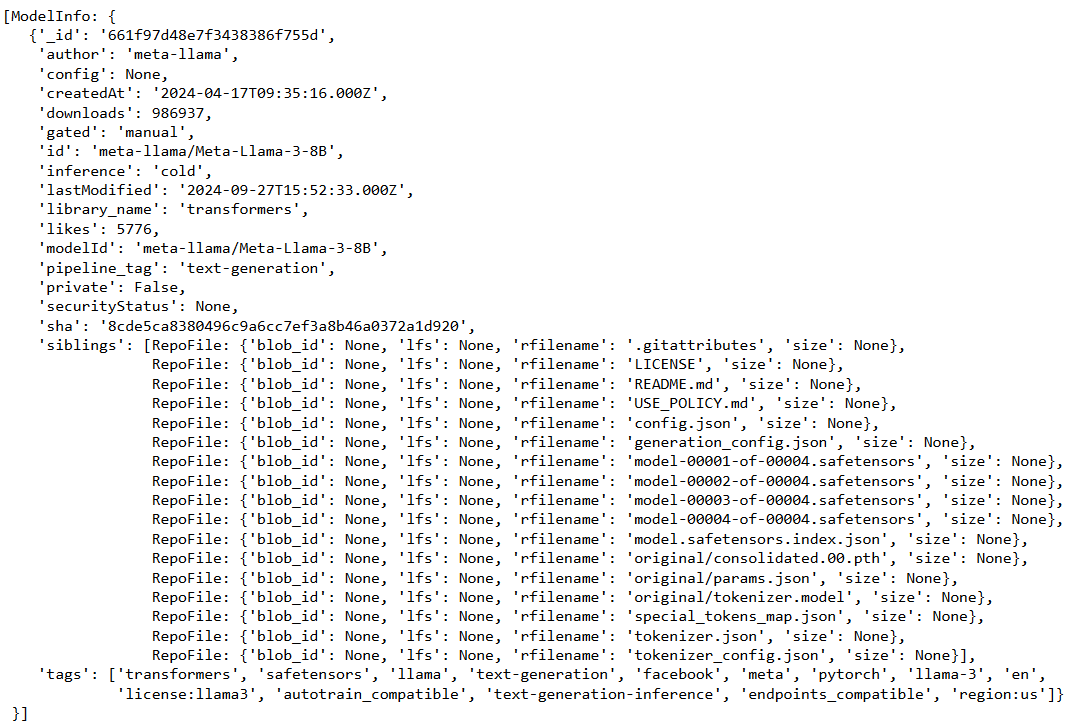

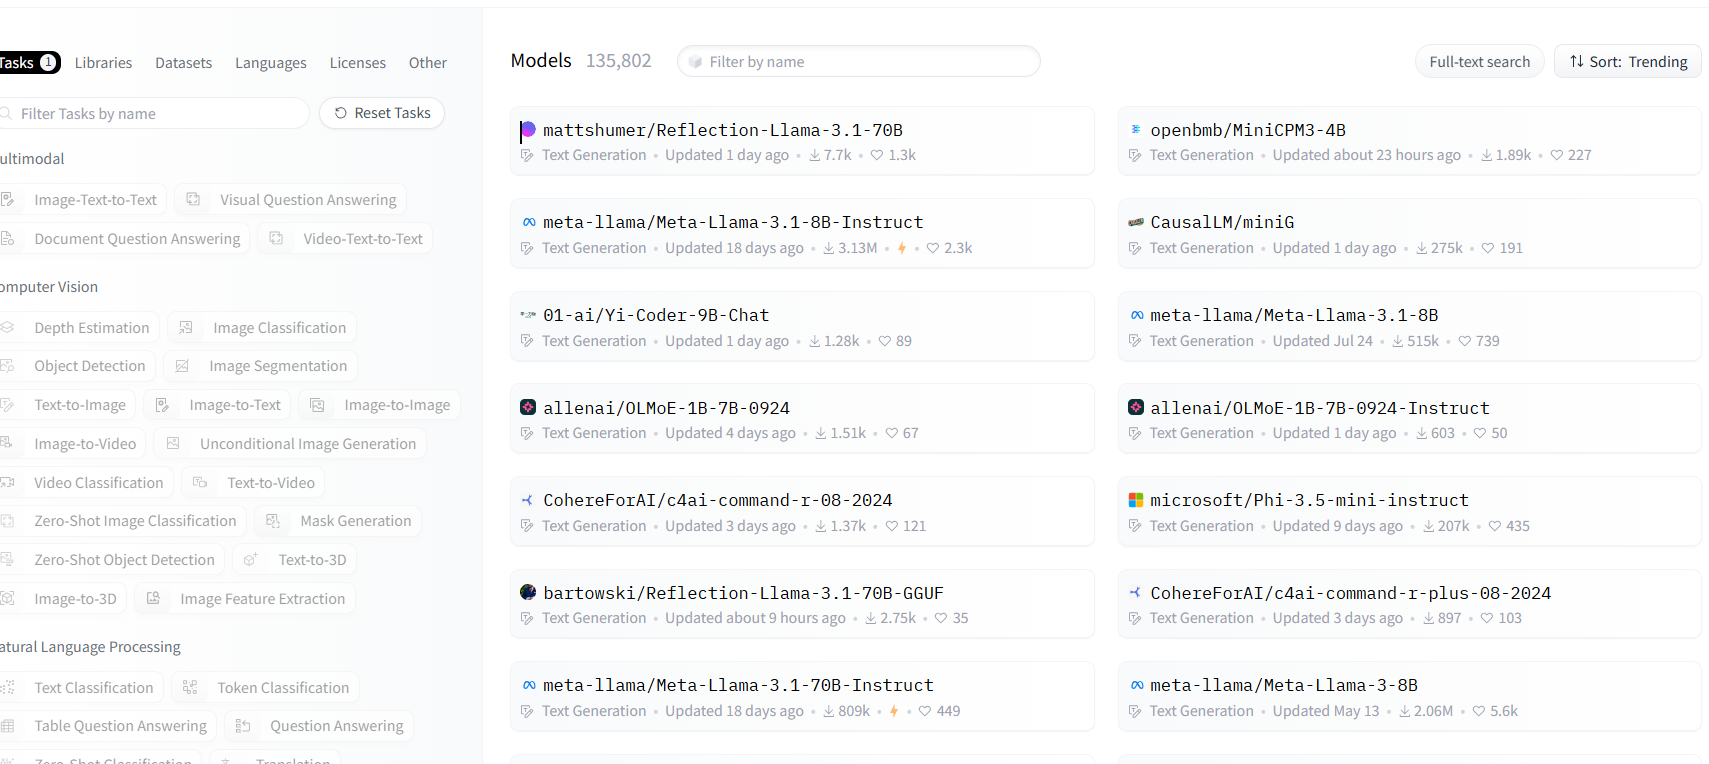

However, we may not have access to all Hugging Face models. For example, access to model **meta-llama/Meta-Llama-3-8B** is restricted. We should be authenticated to access it:

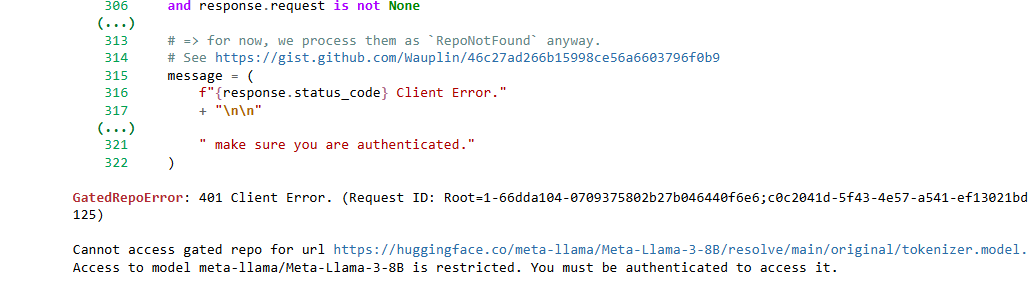

Therefore, we use **Qwen/Qwen1.5-0.5B-Chat-GGUF** that is publicly available and is relatively small model compared with.

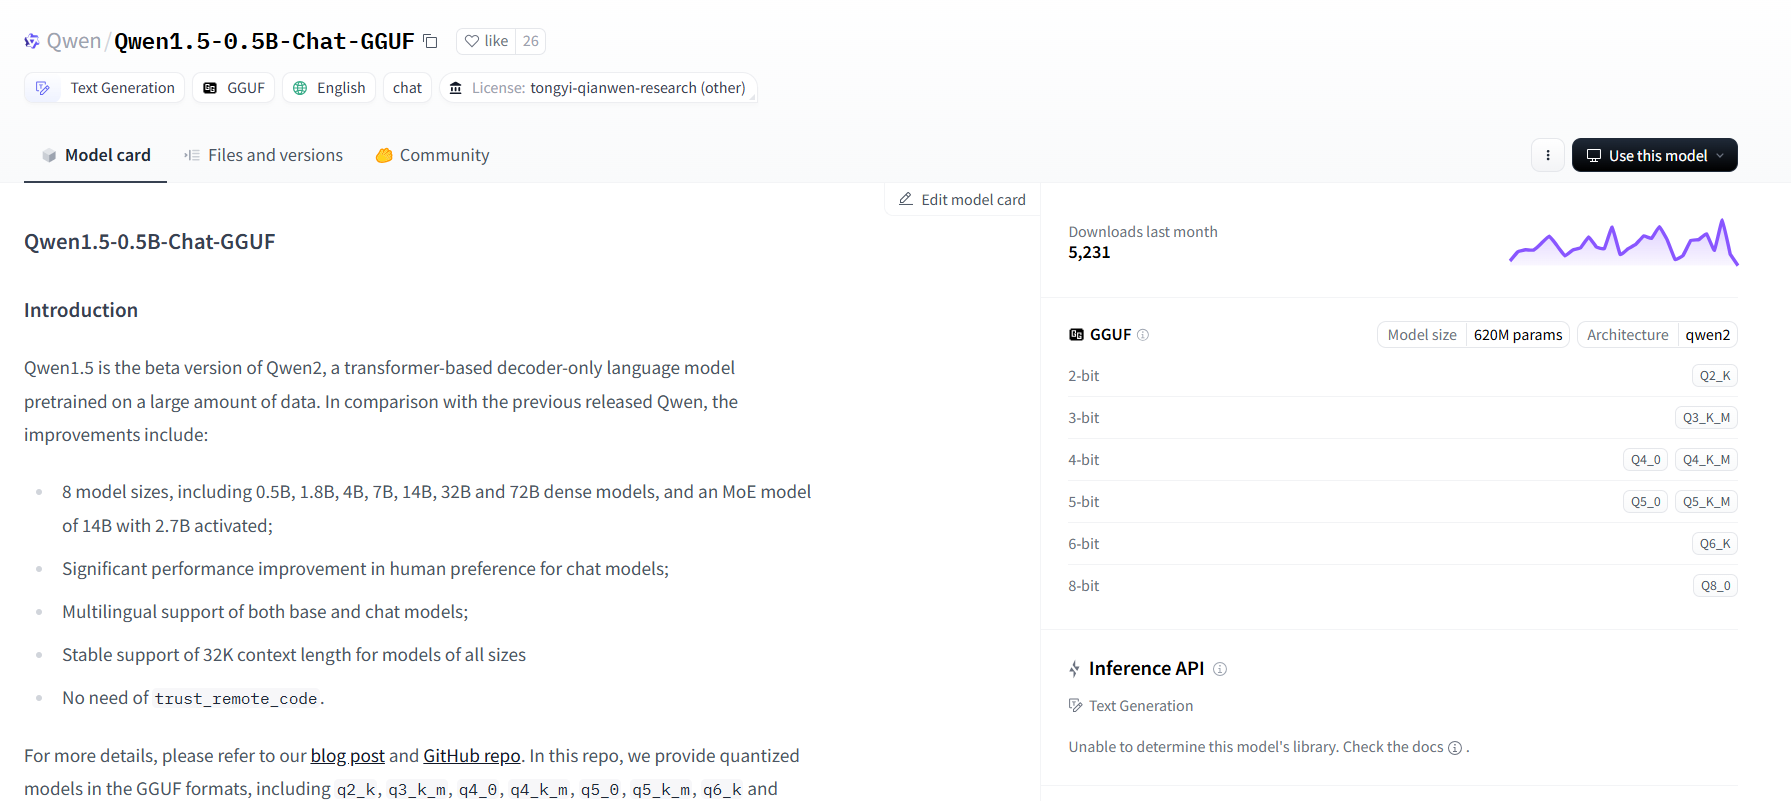

In [5]:
llm_llama = Llama.from_pretrained(
repo_id="Qwen/Qwen1.5-0.5B-Chat-GGUF",
filename="*q8_0.gguf"
)

clear_output(wait=True)
print(f'load pretrained Qwen/Qwen1.5-0.5B-Chat-GGUF')

load pretrained Qwen/Qwen1.5-0.5B-Chat-GGUF


## How to Control Model Completion

In [6]:
query = "Q: What is the age of earth? A:"
output_llama = llm_llama(
    query, # Prompt
    max_tokens=35,
    stop=["Q:", "\n"], # model stops generating text when it encounters any of the strings listed in the stop
    temperature=0.8,
    seed=986, # set random seed
    repeat_penalty=1. # discourages the model from repeating the same tokens or phrases
)
clear_output(wait=True)
print(output_llama['choices'][0]['text'])

 4.6 billion years B: 7.1 billion years C: 1.4 billion years D: 4.3 billion years


In [7]:
# Generate text from a prompt
output = llm_llama.create_completion(query)
clear_output(wait=True)
output

{'id': 'cmpl-ba8387c1-e515-4b27-ba83-54a7b593f73b',
 'object': 'text_completion',
 'created': 1730549458,
 'model': 'C:\\Users\\mrezv\\.cache\\huggingface\\hub\\models--Qwen--Qwen1.5-0.5B-Chat-GGUF\\snapshots\\cfab082d2fef4a8736ef384dc764c2fb6887f387\\.\\qwen1_5-0_5b-chat-q8_0.gguf',
 'choices': [{'text': ' 4.5 billion B: 5.0 billion C: 6',
   'index': 0,
   'logprobs': None,
   'finish_reason': 'length'}],
 'usage': {'prompt_tokens': 11, 'completion_tokens': 16, 'total_tokens': 27}}

## How to Create Chat Completions

The method `create_chat_completion` for an LLaMA-based model is designed to handle conversational AI tasks, where multiple turns of dialogue occur between the user and the model. Here's how it works in the context of your code:

- The `messages` parameter is a list of dictionaries where each dictionary represents a message in the conversation. Each message has two keys:
     - **role**: The role of the message sender. Possible roles include:
       - **"system"**: Used to set initial conditions or context for the model. In this case, the system message sets the context by saying the model is a "geographical expert," helping guide its behavior for subsequent responses.
       - **"user"**: Represents a message from the user. This is typically a prompt or a question.
     - **content**: The actual content of the message, either instructions or questions for the model to respond to. In this case, the user asks, "Describe Iran in two sentences."

In [8]:
output = llm_llama.create_chat_completion(
    messages = [
        {
            "role": "system",
            "content": "You are a geographical expert"
        },
        {
            "role": "user",
            "content": "Describe Iran in two sentences"
        }
    ]
)
clear_output(wait=True)
print(output['choices'][0]['message']['content'])

 Iran is a country located in South Asia, with a population of over 1.3 billion people. It is known for its rich history, culture, and natural beauty, including its stunning landscapes, ancient cities, and diverse cuisine.


In [9]:
output['choices'][0]

{'index': 0,
 'message': {'role': 'assistant',
  'content': ' Iran is a country located in South Asia, with a population of over 1.3 billion people. It is known for its rich history, culture, and natural beauty, including its stunning landscapes, ancient cities, and diverse cuisine.'},
 'logprobs': None,
 'finish_reason': 'stop'}

## Prompt Engineering

To write an efficient prompt, follow these guidelines:

1. **Precise:** Be specific about the task or information you want from the model. Avoid vague language.
   
   Example: Instead of "Explain data science," try "Explain the role of feature selection in a machine learning model."

2. **Short:** Keep the prompt concise. Include only the necessary details to minimize ambiguity and focus the model's response.

3. **Direct:** Ask clear, direct questions or give straightforward commands. 

   Example: "Summarize this article in one sentence."

4. **Beginning or End:** Place the main task at the beginning or end of the input text, making it more prominent.

   Example: "Generate a Python function to calculate the sum of a list."

5. **Separated from the Input Text:** If you are giving instructions based on specific content, clearly separate the instruction from the data.

   Example:   
   **Instruction:** "Summarize the following paragraph in 50 words or less."  
   **Text:** [Include the paragraph here.]

6. **Completion Keywords:** Use keywords like "generate," "list," or "explain" to signal the desired type of completion.

7. **Chain-of-Thought:** Encourage step-by-step reasoning by asking the model to think through the process.

   Example: "Explain how feature scaling impacts model performance. First, define feature scaling. Then, discuss its benefits and potential issues."
   
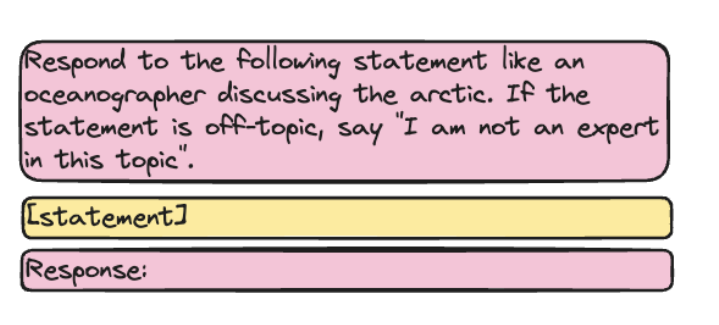   

### Few-shot prompting

**Few-shot prompting** involves providing the model with a set of examples to guide its behavior. The examples demonstrate how inputs should be structured and what kind of outputs are expected. This is particularly useful when the task is complex, or when you want the model to follow a specific pattern.

Let's break down how few-shot prompting works in the provided context:

---

 
**Prompt with Examples**

- In this case, you're giving the model examples of converting text-based descriptions of mathematical expressions into equations.
   ```
   Text: x is two sixty-four point five to the power of five
   equation: x = 264.5^5
   Text: x is nine thousand fifty three divided by ten
   equation:
   ```
   
- The model sees how the text inputs (natural language) are structured and how the outputs (equations) are formatted.
- You give two examples in a few-shot manner to help the model understand the pattern.


* **1-shot Prompting**

In [10]:
example = """Question: x is two sixty-four point five to the power of five
Response: x = 264.5^5"""

prompt = f""" Instruction: convert text to equation. See example below:
{example}

Question: x is nine thousand fifty three divided by ten
Response:
 
 """ 

In [11]:
output = llm_llama(
    prompt, # Prompt
    max_tokens=30,
    temperature=0,
    stop=["Q:", "\n"], 
    seed=233, # set random seed
    repeat_penalty=1. # discourages the model from repeating the same tokens or phrases
)
clear_output(wait=True)
print(output['choices'][0]['text'])

 1953  ÷ 10 = 1953.0


* **3-shot prompting**

In [12]:
# Fill in the 3-shot prompt (you can use multiple lines)
text = """
Review: My order was delayed by more than an hour with no communication. Very frustrating! 
Sentiment: negative

Review: I ordered from here last night and was pleasantly surprised! 
Sentiment: positive

Review: The food is excellent. I highly recommend it! 
Sentiment: positive
"""

prompt = f"""Instruction: predict the best sentiment for the reveiws of a restaurant. The sentiments are
"postive", "negative" or "neutral". See example below:
{text}

what is the Sentiment for this review:
Disappointed with Yummy this time. The order arrived late and the food was cold.

"""

output = llm_llama(
    prompt, # Prompt
    max_tokens=20,
    temperature=0,
    stop=["Q:", "\n"], 
    seed=32, # set random seed
    repeat_penalty=1. # discourages the model from repeating the same tokens or phrases
)
clear_output(wait=True)
print(output['choices'][0]['text'])

`Qwen/Qwen1.5-0.5B-Chat-GGUF` cannot predict sentiment. Lets try another Llama model [`bartowski/Llama-3.2-1B-Instruct-GGUF`](https://huggingface.co/bartowski/Llama-3.2-1B-Instruct-GGUF)

In [13]:
import gradio as gr
from llama_cpp import Llama

model = "bartowski/Llama-3.2-1B-Instruct-GGUF"
llm_Llama_3_2 = Llama.from_pretrained(
    repo_id=model,
    filename="Llama-3.2-1B-Instruct-f16.gguf",
    verbose=True,
    use_mmap=True,
    use_mlock=True,
    n_threads=2,
    n_threads_batch=2,
    n_ctx=2000,
)
clear_output(wait=True)
print(f'load pretrained {model}')

load pretrained bartowski/Llama-3.2-1B-Instruct-GGUF


In [14]:
output = llm_Llama_3_2(
    prompt, # Prompt
    max_tokens=20,
    temperature=0.5,
    stop=["Q:", "\n"], 
    seed=32, # set random seed
    repeat_penalty=1. # discourages the model from repeating the same tokens or phrases
)
clear_output(wait=True)
print(output['choices'][0]['text'])

Sentiment: negative


Great! `bartowski/Llama-3.2-1B-Instruct-GGUF` can predict sentiment correctly.

Another example:

In [15]:
text="""EN: Hello
FR: Bonjour
EN: Goodbye
FR: Au revoir
EN: Good day
FR:
"""

prompt = f"""Instruction: translate English, EN, to Freanch, FR. See examples below:
{text}

what is EN: Good day in FR:


"""

In [16]:
output = llm_llama(
    prompt, 
    max_tokens=32, 
    stop=["Q:","\n"],) 
clear_output(wait=True)
print(output['choices'][0]['text'])

`Qwen/Qwen1.5-0.5B-Chat-GGUF` cannot predict language. Lets try `bartowski/Llama-3.2-1B-Instruct-GGUF`

In [17]:
output = llm_Llama_3_2(
    prompt, 
    max_tokens=32, 
    stop=["Q:","\n"],) 
clear_output(wait=True)
print(output['choices'][0]['text'])

FR: Bonjour!


# Llama Completions Types

## Basic Completion
This is a simple text generation mode where the model completes a prompt by predicting the next sequence of tokens based on the input. It is often used to generate longer pieces of text from an initial context.

**Example**:  
- **Input**: "The future of AI is..."
- **Output**: "...promising as it continues to evolve and revolutionize industries."



In [18]:
output = llm_Llama_3_2(
"Q: what is future of AI? A:", # Prompt
max_tokens=70, # Max tokens to generate
stop=["Q:"], # Stop when encounter this
)
clear_output(wait=True)
print(output['choices'][0]['text'])

 The future of AI is uncertain, but here are some of the possible trends and directions:

1.  **Increased Adoption**: AI is becoming more ubiquitous in various industries, including healthcare, finance, transportation, and education.

2.  **Ethics and Governance**: There are growing concerns about AI ethics and governance. As AI becomes more integrated into our


##  Streaming Completion
This allows the model to return text as it is being generated in real-time. Instead of waiting for the entire response to be generated, streaming completion sends partial responses as the model progresses. This can improve responsiveness in applications like chatbots, where you want to deliver results to the user quickly.

**Example**:  
- **Input**: "Write a story about space exploration."
- **Output** (streamed): "Once upon a time..." followed by further tokens generated as the model progresses.



In [19]:
output = llm_Llama_3_2(
    "Q: what is future of AI is? A:", # Prompt
    max_tokens=70, # Max tokens to generate
    stop=["Q:"], # Stop when encounter this
    stream=True,
)

clear_output(wait=True)

for token in output:
    print(token['choices'][0]['text'], end='')

Llama.generate: 8 prefix-match hit, remaining 4 prompt tokens to eval


 The future of AI is exciting and vast, with potential applications in various fields such as healthcare, finance, transportation, and education. Here are some key trends and predictions:
1. Advancements in Natural Language Processing (NLP): NLP will become more sophisticated, enabling AI systems to understand and generate human language more effectively.
2. Increased


llama_print_timings:        load time =    8384.69 ms
llama_print_timings:      sample time =      12.82 ms /    70 runs   (    0.18 ms per token,  5459.79 tokens per second)
llama_print_timings: prompt eval time =     380.32 ms /     4 tokens (   95.08 ms per token,    10.52 tokens per second)
llama_print_timings:        eval time =    9220.21 ms /    69 runs   (  133.63 ms per token,     7.48 tokens per second)
llama_print_timings:       total time =    9782.32 ms /    73 tokens


 use of

## Chat Completions (JSON format)
Chat completion focuses on multi-turn interactions, typically for conversational agents. The model is fine-tuned for a more interactive experience, understanding prompts like questions and instructions in a chat format. In Llama, this is used in chatbot applications and dialogue systems. It gives output in JSON format.

**Example**:
- **User**: "What's the capital of France?"
- **Model**: "The capital of France is Paris."



In [20]:
output = llm_Llama_3_2.create_chat_completion(
messages=[
    {"role": "system", 
     "content": "You are a helpful assistant that outputs in JSON.",},
    {"role": "user", 
     "content": "What's the capital of France?"},
],
response_format={"type": "json_object",}
)
clear_output(wait=True)
print(output['choices'][0]['message']['content'])

{
  "title": "Capital of France",
  "country": "France",
  "capital": "Paris"
}


## JSON Schema Mode 
This mode enforces the model's output to conform to a predefined JSON schema. It can be particularly useful when you need the model to return a well-structured response that adheres to specific rules or formats. The schema ensures the model generates output with specific fields and types (e.g., integers, strings, objects).

**Example**:  
- **Schema**:
  ```json
  {
    "type": "object",
    "properties": {
      "name": { "type": "string" },
      "age": { "type": "integer" },
      "is_student": { "type": "boolean" }
    }
  }
  ```
- **Input**: "Describe a person named Alex who is a student."
- **Output**:
  ```json
  {
    "name": "Alex",
    "age": 20,
    "is_student": true
  }
  ```

These modes allow you to handle different use cases, from simple text generation to highly structured outputs.

In [21]:
output = llm_Llama_3_2.create_chat_completion(
messages=[
    {"role": "system", 
     "content": "You are a helpful assistant that outputs in JSON.",},
    {"role": "user", 
     "content": "What is the name of famous laptop brands and its approximate prices in US dollar?"},
],
response_format=
    {
        "type": "json_object",
        "properties": {
            "name": {"type": "string"},
            "price": {"type": "integer"}
        }
    }
)
    
clear_output(wait=True)
print(output['choices'][0]['message']['content'])

{
  "famous_laptop_brands": [
    {
      "name": "Dell",
      "approximate_price": "$300-$1,500"
    },
    {
      "name": "Apple",
      "approximate_price": "$1,000-$5,000"
    },
    {
      "name": "HP",
      "approximate_price": "$200-$1,200"
    },
    {
      "name": "Lenovo",
      "approximate_price": "$300-$1,500"
    },
    {
      "name": "Asus",
      "approximate_price": "$200-$1,000"
    },
    {
      "name": "Acer",
      "approximate_price": "$200-$800"
    }
  ]
}


# How to Tune Inference Parameters

In generative AI, parameters like **Temperature**, **Top-K**, and **Top-P** control the randomness and diversity of generated text, affecting how creative or conservative the output is. Here's an explanation of each parameter with examples across **low**, **medium**, and **high** values.

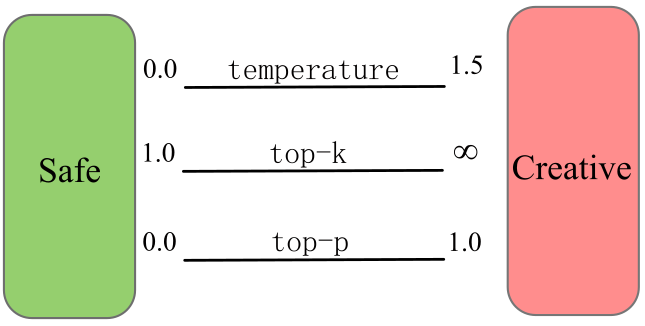

## Temperature

The **Temperature** parameter controls the randomness of the predictions by scaling the logits before applying softmax. Higher values of temperature increase diversity, leading to more creative or unexpected outputs, while lower values make the model more focused and deterministic.

In [22]:
prompt = "Once upon a time, there was a king,"
output = llm_Llama_3_2(
    prompt, 
    max_tokens=70,
    temperature = 0.1,
)
clear_output(wait=True)
print(output['choices'][0]['text'])

 a queen, and a prince who lived in a small village. The king was a just and fair ruler, loved by his people, and the queen was a wise and kind leader. The prince, however, was a bit of a troublemaker. He loved to play pranks on his parents and cause mischief wherever he went.

One day, the


In [23]:
output = llm_Llama_3_2(
    prompt, 
    max_tokens=70,
    temperature = 0.7,
)
clear_output(wait=True)
#print(output['choices'][0]['text'])

Llama.generate: 10 prefix-match hit, remaining 1 prompt tokens to eval

llama_print_timings:        load time =    8384.69 ms
llama_print_timings:      sample time =      13.40 ms /    70 runs   (    0.19 ms per token,  5223.49 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     0 tokens (-nan(ind) ms per token, -nan(ind) tokens per second)
llama_print_timings:        eval time =   11578.01 ms /    70 runs   (  165.40 ms per token,     6.05 tokens per second)
llama_print_timings:       total time =   11747.51 ms /    70 tokens


In [24]:
output = llm_Llama_3_2(
    prompt, 
    max_tokens=70,
    temperature = 1.5,
)
clear_output(wait=True)
print(output['choices'][0]['text'])

 and one of his most trusted advisors was a wise old man. The old man possessed the knowledge and skills to make many decisions for the king, and the king was deeply grateful to him for his counsel. For many years, the old man worked in the palace, serving the king in his capacity as advisor and advisor-in-chief. The king's subjects


## Top-K Sampling

In **Top-K Sampling**, the model considers only the top-K most probable tokens at each step during generation. Higher values of K include more potential tokens, leading to more diverse outputs.


In [25]:
output = llm_Llama_3_2(
    prompt, 
    top_k=0,
)
clear_output(wait=True)
print(output['choices'][0]['text'])

 and his kingdom was like a puzzle, with many pieces that fit together in different


## Top-P (Nucleus Sampling


**Top-P Sampling** selects tokens from the smallest possible set whose cumulative probability exceeds a certain threshold. It ensures a flexible cut-off based on the probability mass, unlike Top-K, which is fixed.


In [26]:
output = llm_Llama_3_2(
    prompt, 
    top_p=0,
)
clear_output(wait=True)
print(output['choices'][0]['text'])

 a queen, and their two children, a boy and a girl. The king


* **Summary Table**

| Parameter    | Low                          | Medium                             | High                                  |
|--------------|------------------------------|------------------------------------|---------------------------------------|
| **Temperature** | Deterministic and repetitive | Balanced creativity and coherence | Creative, often unpredictable        |
| **Top-K**       | Most probable token only    | More diverse, but still coherent  | Highly creative, sometimes nonsensical |
| **Top-P**       | Most probable few tokens    | Balanced diversity and coherence  | Almost all tokens considered, high creativity |

Each parameter adjusts how creative or conservative the generative model behaves, allowing you to control the balance between coherence and diversity in generated content.

## Create a GenerativeAIModel Instance

In [27]:
response_format={
        "type": "json_object",
        "properties": {
            "name": {"type": "string"},
            "price": {"type": "integer"}
        }
    }


class GenerativeAIModel:
    def __init__(self,llm, system_prompt='', 
                 temperature=0.1, top_k=1, top_p=0.1):
        # Instance attributes
        self.temperature = temperature
        self.top_k = top_k
        self.top_p = top_p
        self.llm = llm
        self.system_prompt = system_prompt
        self.history = [{"role": "system", "content": self.system_prompt}]

    # Method to display the attributes
    def create_completion(self, user_prompt=''):
        self.history += [{"role": "user", "content": user_prompt}, ]
        output = llm_Llama_3_2.create_chat_completion(messages=self.history, 
                                            response_format=response_format)

        return output['choices'][0]['message']['content']

In [28]:
genai = GenerativeAIModel(llm_Llama_3_2,
              system_prompt="You are a helpful assistant that outputs in JSON.")
user_prompt = "What is the name of famous laptop brands and its approximate prices in US dollar?"
output = genai.create_completion(user_prompt)
clear_output(wait=True)
print(output)

{
  "famous_laptop_brands": [
    {
      "brand": "Dell",
      "approximate_price": "$300-$1,500"
    },
    {
      "brand": "Apple",
      "approximate_price": "$1,000-$5,000"
    },
    {
      "brand": "HP",
      "approximate_price": "$200-$1,500"
    },
    {
      "brand": "Lenovo",
      "approximate_price": "$300-$2,000"
    },
    {
      "brand": "Asus",
      "approximate_price": "$300-$1,500"
    },
    {
      "brand": "Acer",
      "approximate_price": "$200-$1,000"
    },
    {
      "brand": "Microsoft",
      "approximate_price": "$1,000-$3,000"
    },
    {
      "brand": "Razer",
      "approximate_price": "$500-$2,000"
    },
    {
      "brand": "Toshiba",
      "approximate_price": "$300-$1,500"
    },
    {
      "brand": "Sony",
      "approximate_price": "$1,000-$3,000"
    }
  ]
}


In [29]:
%time
output = llm_Llama_3_2.create_chat_completion(
messages=[
    {"role": "system", 
     "content": "You are a helpful assistant that outputs in JSON.",},
    {"role": "user", 
     "content": "What is the name of famous laptop brands and its approximate prices in US dollar?"},
],
response_format=
    {
        "type": "json_object",
        "properties": {
            "name": {"type": "string"},
            "price": {"type": "integer"}
        }
    }
)
    
clear_output(wait=True)
print(output['choices'][0]['message']['content'])

{
  "famous_laptop_brands": [
    {
      "name": "Dell",
      "approximate_price": "$300-$1,500"
    },
    {
      "name": "Apple",
      "approximate_price": "$1,000-$5,000"
    },
    {
      "name": "HP",
      "approximate_price": "$200-$1,200"
    },
    {
      "name": "Lenovo",
      "approximate_price": "$200-$1,500"
    },
    {
      "name": "Asus",
      "approximate_price": "$300-$1,500"
    },
    {
      "name": "Acer",
      "approximate_price": "$200-$1,000"
    },
    {
      "name": "Microsoft",
      "approximate_price": "$1,000-$3,000"
    },
    {
      "name": "Razer",
      "approximate_price": "$500-$2,000"
    },
    {
      "name": "Toshiba",
      "approximate_price": "$300-$1,500"
    },
    {
      "name": "Sony",
      "approximate_price": "$1,000-$3,000"
    }
  ]
}


# Fine-tuning

https://medium.com/@anshulshivhare22/fine-tuning-llama2-on-the-dolly-dataset-part-1-e3c40c31699f

Fine-tuning a LLaMA model,  is required to adapt it to specific tasks and domains. Here's why it is essential:

1. **Uses Domain-Specific Datasets**: While the base LLaMA model is pre-trained on a broad corpus, it may not perform optimally for specialized tasks or domains (e.g., healthcare, finance). Fine-tuning with domain-specific datasets ensures the model becomes more relevant and accurate for the given context.

2. **Training on Task-Specific Data**: Pre-trained models like LLaMA are generalists. Fine-tuning them with task-specific data (e.g., for question-answering, sentiment analysis, or summarization) helps improve performance on these particular tasks, allowing the model to specialize in delivering better results.

3. **Updates Model Parameters**: During fine-tuning, the model's parameters are adjusted by retraining on the task-specific dataset. This process allows the model to better understand patterns, nuances, and language constructs related to the task, which improves its predictions and general understanding of the content.

4. **Improve Accuracy**: By retraining on more relevant and specific data, the fine-tuned model can make more accurate predictions or classifications. It reduces errors that may have arisen from the model’s broad general knowledge.

5. **Reduce Bias**: Pre-trained models may carry biases from the broad data they were trained on. Fine-tuning on balanced and curated datasets helps mitigate those biases, making the model's predictions fairer and more aligned with the desired outcomes.

6. **Improve Knowledge Base**: Fine-tuning allows the model to incorporate updated or specialized knowledge into its "understanding." This is crucial when working with niche areas where the model's pre-existing knowledge might be outdated or incomplete, ensuring more relevant and current outputs.


First we need to divide data into training set, validation set and test set:

- **Training Set**: A large portion of the data used to train the model.
- **Validation Set**: Used to adjust hyperparameters and choose the best model.
- **Test Set**: Reserved for evaluating the model's final performance.

## Load  [`databricks-dolly-15k`](https://huggingface.co/datasets/databricks/databricks-dolly-15k)

The **Databricks-Dolly-15k** dataset is a collection of over 15,000 records created by Databricks employees to help large language models replicate the interactive capabilities of ChatGPT. Employees generated prompt-response pairs across eight instruction categories, including those from the InstructGPT paper, plus an open-ended category. They were instructed not to use external web sources (except Wikipedia for specific cases) and avoid generative AI in crafting responses.

Midway through, contributors were allowed to answer each other's questions, rephrasing them and ensuring they could answer correctly. For some categories, they included reference texts from Wikipedia, with citation numbers (e.g., [42]) that should be removed for downstream use.

In [30]:
from datasets import load_dataset, Dataset
import pprint
ds_dolly = load_dataset(
    'databricks/databricks-dolly-15k',
    split="train"
)
print(ds_dolly.column_names)

['instruction', 'context', 'response', 'category']


In [31]:
from datasets import load_dataset, Dataset
import pprint
customer_support = load_dataset(
    'bitext/Bitext-customer-support-llm-chatbot-training-dataset',
    split="train"
)
print(customer_support.column_names)

['flags', 'instruction', 'category', 'intent', 'response']


In [32]:
print(customer_support.shape)

(26872, 5)


In [33]:
ds_dolly

Dataset({
    features: ['instruction', 'context', 'response', 'category'],
    num_rows: 15011
})

In [34]:
# take first 5000 data
train_test = customer_support[:500]
train_test = Dataset.from_dict(train_test)

In [35]:
train_test

Dataset({
    features: ['flags', 'instruction', 'category', 'intent', 'response'],
    num_rows: 500
})

Look at data with `pprint` library.

In [36]:
pprint.pprint(train_test[0])

{'category': 'ORDER',
 'flags': 'B',
 'instruction': 'question about cancelling order {{Order Number}}',
 'intent': 'cancel_order',
 'response': "I've understood you have a question regarding canceling order "
             "{{Order Number}}, and I'm here to provide you with the "
             'information you need. Please go ahead and ask your question, and '
             "I'll do my best to assist you."}


In [37]:
hold_out = customer_support[500:600]
hold_out = Dataset.from_dict(hold_out)

In [38]:
hold_out

Dataset({
    features: ['flags', 'instruction', 'category', 'intent', 'response'],
    num_rows: 100
})

## Data Preprocessing

In [39]:
def merge_example(row):
    row['conversation'] = f"Query: {row['instruction']}\nResponse: {row['response']}"
    return row
train_test = train_test.map(merge_example)

Map: 100%|██████████| 500/500 [00:00<00:00, 7529.28 examples/s]


In [40]:
train_test

Dataset({
    features: ['flags', 'instruction', 'category', 'intent', 'response', 'conversation'],
    num_rows: 500
})

In [41]:
pprint.pprint(train_test['conversation'][0])

('Query: question about cancelling order {{Order Number}}\n'
 "Response: I've understood you have a question regarding canceling order "
 "{{Order Number}}, and I'm here to provide you with the information you need. "
 "Please go ahead and ask your question, and I'll do my best to assist you.")


In [42]:
hold_out = hold_out.map(merge_example)

Map: 100%|██████████| 100/100 [00:00<00:00, 4105.62 examples/s]


## Fine-tuning with Hugging Face

Fine-tuning a language model with Hugging Face involves adapting a pre-trained model to a specific task using additional training data. Here’s what you need to conduct fine-tuning:

### Language Model + Tokenizer

We need a pre-trained model and its corresponding tokenizer.

In [43]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import LlamaForCausalLM, LlamaTokenizer, Trainer, TrainingArguments

model_name="TinyLlama/TinyLlama-1.1B-Chat-v1.0"
model_llamma = LlamaForCausalLM.from_pretrained(model_name)
tokenizer = LlamaTokenizer.from_pretrained(model_name)

# Ensure tokenizer uses the proper padding token (for LLaMA, this is often the EOS token)
tokenizer.pad_token = tokenizer.eos_token

### Training Dataset

We require a task-specific dataset.

In [44]:
type(train_test)

datasets.arrow_dataset.Dataset

In [45]:
trainer_dataset = train_test.train_test_split(test_size=0.2)
trainer_dataset

DatasetDict({
    train: Dataset({
        features: ['flags', 'instruction', 'category', 'intent', 'response', 'conversation'],
        num_rows: 400
    })
    test: Dataset({
        features: ['flags', 'instruction', 'category', 'intent', 'response', 'conversation'],
        num_rows: 100
    })
})

In [46]:
trainer_dataset['train'][50]['conversation']

"Query: can ya help me cancel purchase {{Order Number}}\nResponse: Certainly, I'm here to assist you with canceling purchase {{Order Number}}. Let's work through this together:\n\n1. **Access Your Account**: Start by logging in to your {{Online Company Portal Info}} using your credentials.\n2. **Find Your Orders**: Once logged in, navigate to the '{{Online Order Interaction}}' or '{{Online Order Interaction}}' section.\n3. **Locate the Purchase**: Look for the purchase connected to the order number {{Order Number}} and select it to view the details.\n4. **Initiate the Cancellation**: You'll find the option labeled '{{Online Order Interaction}}' associated with the specific purchase. Click on it to begin the cancellation process.\n5. **Complete Any Additional Steps**: The system may present some questions or prompts for confirmation or feedback. Please follow the instructions provided to successfully cancel the order.\n\nIf you encounter any challenges or have further questions, our ded

## Efficient fine-tuning with LoRA

LoRA helps fine-tunes larger models with limited hardware.

What happens when we train a model?

- **Samples are input vectors**: The data you train on is represented as a set of input values (features), which form vectors.
  
- **Models are matrices**: The model is a collection of numbers (weights) organized into matrices, which determine how the inputs are transformed.

- **Matrix multiplication**: The input vectors are multiplied by the model's matrices to produce output vectors.

- **Results in output vectors**: The multiplication produces results, which are the model's predictions.

- **Errors are used to update model weights**: The difference between the predictions and actual values (errors) is calculated, and the model adjusts its weights (parameters) to improve future predictions.

- **Model size determines training difficulty**: Larger models have more parameters, making training more complex and resource-intensive.

LoRA (Low-Rank Adaptation) simplifies model fine-tuning by:

- **Low-rank decomposition**: Reduces the size of weight matrices.
- **Reduces training parameters**: Updates fewer weights during training.
- **Maintains performance**: Keeps the model's accuracy close to the original.
- **Regularization effect**: Helps prevent overfitting by limiting changes to the model.

### How to implement LoRA using PEFT

In [47]:
from peft import LoraConfig

lora_config = LoraConfig(
    r=12,                  # Rank of the low-rank adaptation matrix. This controls the dimensionality reduction for the LoRA module.
    lora_alpha=32,         # Scaling factor for the low-rank adaptation. This amplifies the adapted weights.
    lora_dropout=0.05,     # Dropout rate for LoRA layers. Helps in regularizing and preventing overfitting.
    bias="none",           # Specifies how to handle biases. In this case, no additional biases are introduced ("none").
    task_type="CAUSAL_LM", # The type of task being performed. Here it's set for Causal Language Modeling (e.g., autoregressive text generation).
    target_modules=['q_proj', 'v_proj']  # Specifies which layers in the model should have the LoRA applied, targeting the query and value projection layers.
)


### Training Arguments

These define the fine-tuning process, including batch size, learning rate, epochs, and other hyperparameters.

In [48]:
from transformers import TrainingArguments

epochs = 4

# Training argument
training_args = TrainingArguments(
    output_dir="./databricks/results", # Local directory to save check point of our model as fitting
    num_train_epochs=epochs,         # minimum of two epochs
    per_device_train_batch_size=4,  # batch size for training and evaluation, it common to take around 32, 
    per_device_eval_batch_size=4,   # sometimes less or more, The smaller batch size, the more change model update 
    load_best_model_at_end=True,     # Even if we overfit the model by accident, load the best model through checkpoint
    
    # some deep learning parameters that the trainer is able to take in
    warmup_steps = len(trainer_dataset['train']) // 10,  # learning rate scheduler by number of warmup steps
    weight_decay = 0.05,    # weight decay for our learning rate schedule (regularization)
    
    logging_steps = 1,  # Tell the model minimum number of steps to log between (1 means logging as much as possible)
    log_level = 'info',
    evaluation_strategy = 'epoch', # It is "steps" or "epoch", we choose epoch: how many times to stop training to test
    eval_steps = 50,
    save_strategy = 'epoch',  # save a check point of our model after each epoch
    learning_rate=1e-5,  # A typical learning rate for fine-tuning
)


### Fine-Tuning Process

The `Trainer` class is a versatile and flexible tool for fine-tuning various types of models (such as BERT, GPT, T5) across different tasks (like text classification, question answering, etc.) for **general-purpose fine-tuning**.
   
We use a specialized trainer, `SFTTrainer` from Hugging Face's `TRL` library, which handles the fine-tuning process  often employed in fine-tuning large models (e.g., GPT, LLaMA, etc.)

The **SFT (Supervised Fine-Tuning) Trainer** is a training framework commonly used to fine-tune large language models (LLMs) on specific tasks or datasets using supervised learning. In this context:

The **SFT Trainer** is typically built on top of deep learning frameworks like Hugging Face's `Trainer` class, and it automates many common tasks in model fine-tuning, such as:
- Data loading and batching
- Handling the model’s optimizer and learning rate schedule
- Managing multiple training loops (epochs)
- Saving and logging the model’s progress


In [49]:
from trl import SFTConfig, SFTTrainer

# Initialize the SFT (Supervised Fine-Tuning) Trainer for training the model
trainer = SFTTrainer(
    model=model_llamma,  # The model to be fine-tuned
    tokenizer=tokenizer,  # The tokenizer used to process input data for the model
    train_dataset=trainer_dataset['train'],  # The dataset used for training
    eval_dataset=trainer_dataset['test'],
    
    # The name of the field in the dataset that contains the text data for training
    dataset_text_field='conversation',
    
    # The maximum sequence length (number of tokens) to be processed by the model in a single input
    max_seq_length=100,
    
    # Training arguments that define the training configuration (batch size, epochs, etc.)
    args=training_args,
    peft_config=lora_config,
)


The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
Map: 100%|██████████| 100/100 [00:00<00:00, 375.17 examples/s]


In [50]:
trainer.evaluate()


***** Running Evaluation *****
  Num examples = 100
  Batch size = 4


{'eval_loss': 2.5004336833953857,
 'eval_model_preparation_time': 0.0137,
 'eval_runtime': 122.8739,
 'eval_samples_per_second': 0.814,
 'eval_steps_per_second': 0.203}

In [51]:
trainer.train()

***** Running training *****
  Num examples = 400
  Num Epochs = 4
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 400
  Number of trainable parameters = 1,689,600


Epoch,Training Loss,Validation Loss,Model Preparation Time
1,2.195600,2.209981,0.013700
2,1.876800,1.840307,0.013700
3,1.713300,1.604058,0.013700
4,1.712600,1.526662,0.013700



***** Running Evaluation *****
  Num examples = 100
  Batch size = 4
Saving model checkpoint to ./databricks/results\checkpoint-100
loading configuration file config.json from cache at C:\Users\mrezv\.cache\huggingface\hub\models--TinyLlama--TinyLlama-1.1B-Chat-v1.0\snapshots\fe8a4ea1ffedaf415f4da2f062534de366a451e6\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "eos_token_id": 2,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5632,
  "max_position_embeddings": 2048,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 22,
  "num_key_value_heads": 4,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": null,
  "rope_theta": 10000.0,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloat16",
  "transformers_version": "4.45.1",
  "use_cache":

TrainOutput(global_step=400, training_loss=1.8948114222288133, metrics={'train_runtime': 27597.4675, 'train_samples_per_second': 0.058, 'train_steps_per_second': 0.014, 'total_flos': 994753904640000.0, 'train_loss': 1.8948114222288133, 'epoch': 4.0})

In [52]:
trainer.evaluate()


***** Running Evaluation *****
  Num examples = 100
  Batch size = 4


{'eval_loss': 1.5266623497009277,
 'eval_model_preparation_time': 0.0137,
 'eval_runtime': 106.5965,
 'eval_samples_per_second': 0.938,
 'eval_steps_per_second': 0.235,
 'epoch': 4.0}

In [53]:
# We can save our model on drirectory we specified
trainer.save_model()

Saving model checkpoint to ./databricks/results
loading configuration file config.json from cache at C:\Users\mrezv\.cache\huggingface\hub\models--TinyLlama--TinyLlama-1.1B-Chat-v1.0\snapshots\fe8a4ea1ffedaf415f4da2f062534de366a451e6\config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "eos_token_id": 2,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5632,
  "max_position_embeddings": 2048,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 22,
  "num_key_value_heads": 4,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": null,
  "rope_theta": 10000.0,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloat16",
  "transformers_version": "4.45.1",
  "use_cache": true,
  "vocab_size": 32000
}

tokenizer config file saved in ./databricks/results\t

## Load Saved Model 

In [66]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Specify the path where you saved the model and tokenizer
model_path = "results"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Load the model
model_fine_tuned = AutoModelForCausalLM.from_pretrained(model_path)

loading file tokenizer.model
loading file tokenizer.json
loading file added_tokens.json
loading file special_tokens_map.json
loading file tokenizer_config.json
loading configuration file config.json from cache at C:\Users\mrezv\.cache\huggingface\hub\models--TinyLlama--TinyLlama-1.1B-Chat-v1.0\snapshots\fe8a4ea1ffedaf415f4da2f062534de366a451e6\config.json
Model config LlamaConfig {
  "_name_or_path": "TinyLlama/TinyLlama-1.1B-Chat-v1.0",
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "eos_token_id": 2,
  "head_dim": 64,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5632,
  "max_position_embeddings": 2048,
  "mlp_bias": false,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 22,
  "num_key_value_heads": 4,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-05,
  "rope_scaling": null,
  "rope_theta": 10000.0,
  "tie_word_embeddings": fa

## Evaluation 

After fine-tuning, we need an evaluation dataset to assess the model’s performance. This can help you measure improvements in accuracy, generalization, or task-specific metrics.

To evaluate a trained model using ROUGE-1 (Recall-Oriented Understudy for Gisting Evaluation), which measures the ratio of word overlap between a reference and generated text:

   - **Reference Text:** This is the ground truth or the correct output.
   - **Generated Text:** This is the output from your trained model.


In [67]:
import evaluate
rouge = evaluate.load('rouge')
predictions = ["how are you?", "I am a abit under the weather"]
references = ["how are you doing", "I am sick"]
results = rouge.compute(predictions=predictions, references=references)
results

{'rouge1': 0.6285714285714286,
 'rouge2': 0.525,
 'rougeL': 0.6285714285714286,
 'rougeLsum': 0.6285714285714286}

Here are the definitions for the different ROUGE metrics:

1. **ROUGE-1 (`rouge1`)**:
   - Measures the overlap of **unigrams** (single words) between the reference and generated text.
   - It captures the accuracy of individual words in the generated text compared to the reference.
   - Formula: 
     $
     \text{ROUGE-1} = \frac{\text{Number of overlapping unigrams}}{\text{Total unigrams in reference}}
     $

2. **ROUGE-2 (`rouge2`)**:
   - Measures the overlap of **bigrams** (two consecutive words) between the reference and generated text.
   - It provides insight into how well the sequence of words in the generated text matches the reference.
   - Formula:
     $
     \text{ROUGE-2} = \frac{\text{Number of overlapping bigrams}}{\text{Total bigrams in reference}}
     $

3. **ROUGE-L (`rougeL`)**:
   - Measures the **longest common subsequence (LCS)** between the reference and generated text.
   - ROUGE-L focuses on capturing sentence-level structure and fluency by identifying the longest matching sequence of words.
   - It rewards longer subsequences that appear in both texts in the same order.
   - Formula:
     $
     \text{ROUGE-L} = \frac{\text{Length of the longest common subsequence}}{\text{Total number of words in reference}}
     $

4. **ROUGE-Lsum (`rougeLsum`)**:
   - Specifically adapted for **summarization tasks**. 
   - It calculates ROUGE-L at the level of entire summaries rather than individual sentences. It compares the LCS between the entire reference and generated summaries.
   - Useful for evaluating how well a summary preserves the overall meaning of the reference text.


In [68]:
## load fine-tuned model
#output_dir="./databricks/results"
#model = AutoModelForCausalLM.from_pretrained(output_dir)

In [69]:
inst = trainer_dataset['train']['conversation'][0]
inst

"Query: I have got to cancel purchase {{Order Number}}, how do I do it?\nResponse: I hear you loud and clear that you need to cancel purchase {{Order Number}} and I'm here to assist you. To cancel your purchase, please follow these steps:\n\n1. Sign in to Your Account: Go to our {{Online Company Portal Info}} and log in to your account.\n2. Access Your Order History: Once you're signed in, navigate to your '{{Online Order Interaction}}' or '{{Online Order Interaction}}' section.\n3. Locate the Purchase: Look for the purchase associated with the order number {{Order Number}} and click on it.\n4. Initiate the Cancellation: Within the purchase details, you will find the option to '{{Online Order Interaction}}'. Please select this option.\n5. Follow Any Additional Steps: The system may prompt you for further details or feedback to complete the cancellation process. Please provide the necessary information as instructed.\n\nIf you encounter any difficulties or have additional questions, our

In [70]:
query, response = inst.split('\nResponse: ')
query

'Query: I have got to cancel purchase {{Order Number}}, how do I do it?'

In [71]:
# Encode the instruction with the tokenizer
inputs = tokenizer.encode(query, return_tensors="pt", padding=True, truncation=True)

In [72]:
# Generate output from the model with a max length of 500
outputs = model_fine_tuned.generate(
    input_ids=inputs,
    max_length=500,  # Maximum length of the output
    #num_return_sequences=1,  # Number of sequences to return
    temperature=0,  # Sampling temperature to control randomness
)

# Decode the generated output, skipping special tokens
decoded_outputs = tokenizer.decode(outputs[0, inputs.shape[1]:], skip_special_tokens=True)

In [73]:
decoded_outputs

'\nResponse: I\'m here to help you with canceling your purchase with the order number {{Order Number}}. To cancel your purchase, please follow these steps:\n\n1. Log in to your account on our website.\n2. Navigate to the "My Account" or "Order History" section.\n3. Locate the order with the order number {{Order Number}}.\n'

In [61]:
def generate_pred_ref(model, dataset, tokenizer):
    predictions = []
    references = []
    for row in dataset:
        # Encode the instruction with the tokenizer
        query, response = row.split('\nResponse: ')
        query = query.replace('Query: ', '')
        inputs = tokenizer.encode(query, return_tensors="pt")
        
        try: 
            # Generate output from the model with a max length of 500
            outputs = model.generate(inputs, max_length=100, temperature=0)
            
            
            # Decode the generated output, skipping special tokens
            decoded_outputs = tokenizer.decode(outputs[0, inputs.shape[1]:], skip_special_tokens=True)
            
            # Append the reference and prediction to respective lists
            references.append(response)
            predictions.append(decoded_outputs)
        except ValueError:
            pass
    
    return references, predictions


How to run ROUGE-1 on an evaluation set

In [62]:
ref, pred = generate_pred_ref(model_llamma, hold_out['conversation'], tokenizer)

In [63]:
rouge = evaluate.load('rouge')
results = rouge.compute(predictions=pred, references=ref)

In [64]:
results

{'rouge1': 0.24589618753640183,
 'rouge2': 0.0656921178402862,
 'rougeL': 0.15660371383655042,
 'rougeLsum': 0.21583483618046984}